# Car price prediction using Linear regression
Data source: https://www.kaggle.com/adityadesai13/used-car-dataset-ford-and-mercedes

#### no. of data points:  10668
#### no. of attributes: 9 




## Loading the data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
data = pd.read_csv("audi dataset.csv")

In [3]:
print(data.head())

  model  year  price transmission  mileage fuelType  tax   mpg  engineSize
0    A1  2017  12500       Manual    15735   Petrol  150  55.4         1.4
1    A6  2016  16500    Automatic    36203   Diesel   20  64.2         2.0
2    A1  2016  11000       Manual    29946   Petrol   30  55.4         1.4
3    A4  2017  16800    Automatic    25952   Diesel  145  67.3         2.0
4    A3  2019  17300       Manual     1998   Petrol  145  49.6         1.0


In [4]:
print(data.shape)

(10668, 9)


In [5]:
print(data.isnull().sum())

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64


There is No Null Data Present 

In [6]:
print(data.columns)

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')


In [7]:
data.describe()

,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000




Converting Categorical Values into Numerical Values:

In [8]:
# Check how many categories are present in model column
data['model'].value_counts()

 A3     1929
 Q3     1417
 A4     1381
 A1     1347
 A5      882
 Q5      877
 Q2      822
 A6      748
 Q7      397
 TT      336
 A7      122
 A8      118
 Q8       69
 RS6      39
 RS3      33
 RS4      31
 RS5      29
 R8       28
 S3       18
 SQ5      16
 S4       12
 SQ7       8
 S8        4
 S5        3
 RS7       1
 A2        1
Name: model, dtype: int64

In [9]:
data['transmission'].value_counts()

Manual       4369
Semi-Auto    3591
Automatic    2708
Name: transmission, dtype: int64

In [10]:
data['fuelType'].value_counts()

Diesel    5577
Petrol    5063
Hybrid      28
Name: fuelType, dtype: int64

In [11]:
converter = preprocessing.LabelEncoder()

In [12]:
data['fuelTypeNumeric'] = converter.fit_transform(data['fuelType'])
print(data.head())

  model  year  price transmission  mileage fuelType  tax   mpg  engineSize  \
0    A1  2017  12500       Manual    15735   Petrol  150  55.4         1.4   
1    A6  2016  16500    Automatic    36203   Diesel   20  64.2         2.0   
2    A1  2016  11000       Manual    29946   Petrol   30  55.4         1.4   
3    A4  2017  16800    Automatic    25952   Diesel  145  67.3         2.0   
4    A3  2019  17300       Manual     1998   Petrol  145  49.6         1.0   

   fuelTypeNumeric  
0                2  
1                0  
2                2  
3                0  
4                2  


2 = Petrol
0 = Diesel
1 = Hybrid

In [13]:
data['transmission_numeric'] = converter.fit_transform(data['transmission'])
print(data.head())

  model  year  price transmission  mileage fuelType  tax   mpg  engineSize  \
0    A1  2017  12500       Manual    15735   Petrol  150  55.4         1.4   
1    A6  2016  16500    Automatic    36203   Diesel   20  64.2         2.0   
2    A1  2016  11000       Manual    29946   Petrol   30  55.4         1.4   
3    A4  2017  16800    Automatic    25952   Diesel  145  67.3         2.0   
4    A3  2019  17300       Manual     1998   Petrol  145  49.6         1.0   

   fuelTypeNumeric  transmission_numeric  
0                2                     1  
1                0                     0  
2                2                     1  
3                0                     0  
4                2                     1  


1 = Manual
0 = Automatic
2 = Semi-Auto

In [14]:
data = pd.get_dummies(data,columns=['model'])
print(data.head())

   year  price transmission  mileage fuelType  tax   mpg  engineSize  \
0  2017  12500       Manual    15735   Petrol  150  55.4         1.4   
1  2016  16500    Automatic    36203   Diesel   20  64.2         2.0   
2  2016  11000       Manual    29946   Petrol   30  55.4         1.4   
3  2017  16800    Automatic    25952   Diesel  145  67.3         2.0   
4  2019  17300       Manual     1998   Petrol  145  49.6         1.0   

   fuelTypeNumeric  transmission_numeric  ...  model_ RS5  model_ RS6  \
0                2                     1  ...           0           0   
1                0                     0  ...           0           0   
2                2                     1  ...           0           0   
3                0                     0  ...           0           0   
4                2                     1  ...           0           0   

   model_ RS7  model_ S3  model_ S4  model_ S5  model_ S8  model_ SQ5  \
0           0          0          0          0         

## Data visualization

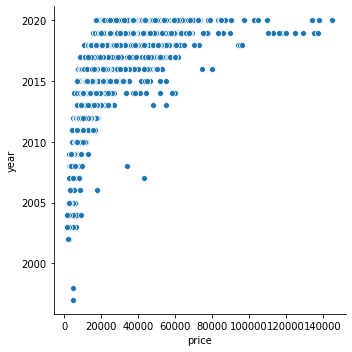

In [15]:
sns.relplot(x="price",y="year",data=data)

**therefore, the price of car increases as the year increases **

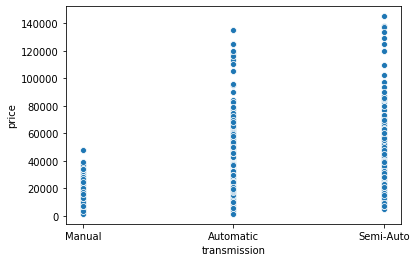

In [16]:
sns.scatterplot(x='transmission',y='price',data=data)

**therefore, automatic and semi auto transmission type vehicles have larger price than manual transmission type **

## splitting data into train and test

In [26]:
X = data.drop(['price','transmission','fuelType'],axis=1)
y = data['price']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=25)

## applying linear regression model


In [20]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
regressor.score(X,y)

0.874726455696923

In [22]:
results = X_test.copy()
results["predicted"] = regressor.predict(X_test)
results["actual"]= y_test.copy()
results = results[['predicted', 'actual']]
results['predicted'] = results['predicted'].round(3)
results

,predicted,actual
10297,15553.295,14700
4766,28481.289,28990
10248,12279.119,12700
7287,24961.688,22990
8631,21480.259,18950
...,...,...
1946,34694.419,30490
4785,16378.648,18490
9990,20046.499,17490
3061,16607.827,13852


***Through The Above Predicted And Actual Values, Our Model is Predicting Nearly Accurate Results***

In [23]:
regressor.coef_

array([ 2.10838747e+03, -8.57720884e-02, -1.76288837e+01, -1.29636493e+02,
        5.86501521e+03,  4.74300756e+02, -1.99241481e+01, -1.28152354e+04,
        1.12581935e+04, -1.07167424e+04, -1.06234108e+04, -8.79968078e+03,
       -7.86242998e+03, -7.07372067e+03, -3.67899178e+03, -1.06275842e+04,
       -8.47014402e+03, -3.32804388e+03,  4.13858883e+03,  1.52680278e+04,
        4.72861012e+04, -1.66836914e+03,  9.49694708e+03,  8.03749173e+03,
        1.24712352e+04,  3.54597155e+03, -6.11219618e+03, -1.46534578e+03,
       -6.90106626e+03, -6.42451470e+03, -1.89054543e+03,  5.18617508e+03,
       -8.23071057e+03])

In [24]:
regressor.intercept_

-4222436.201637576

In [25]:
y_test = results['actual']
y_pred = results['predicted']

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2747.5439301780693
Mean Squared Error: 19274504.48673769
Root Mean Squared Error: 4390.273850995823
